## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.516354 -0.757782  0.953216 -0.003509 -0.500252  0.378704
1  1.342856  0.894210 -1.470606  1.668152  0.766062  2.063688
2 -1.588423 -1.369684 -0.881503  1.234010  0.035835 -0.460893
3  1.713773  1.092639  0.954213 -0.518297 -0.547936 -0.407330
4  0.392605 -1.323230  0.930834  0.468395  1.273931  0.086469


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9603282	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.9513346	total: 64ms	remaining: 31.9s
2:	learn: 0.9409031	total: 64.6ms	remaining: 21.5s
3:	learn: 0.9303710	total: 65.2ms	remaining: 16.2s
4:	learn: 0.9218291	total: 65.7ms	remaining: 13.1s
5:	learn: 0.9127253	total: 66.3ms	remaining: 11s
6:	learn: 0.9015283	total: 66.8ms	remaining: 9.47s
7:	learn: 0.8924255	total: 67.3ms	remaining: 8.35s
8:	learn: 0.8827550	total: 67.8ms	remaining: 7.47s
9:	learn: 0.8737936	total: 68.3ms	remaining: 6.76s
10:	learn: 0.8630914	total: 68.9ms	remaining: 6.2s
11:	learn: 0.8539794	total: 69.4ms	remaining: 5.72s
12:	learn: 0.8462228	total: 70ms	remaining: 5.32s
13:	learn: 0.8373820	total: 70.5ms	remaining: 4.97s
14:	learn: 0.8303083	total: 71ms	remaining: 4.66s
15:	learn: 0.8236633	total: 71.5ms	remaining: 4.39s
16:	learn: 0.8152437	total: 71.9ms	remaining: 4.16s
17:	learn: 0.8076282	total: 72.4ms	remaining: 3.95s
18:	learn: 0.7991932	total: 72.9ms	remaining: 3.76s
1

97:	learn: 0.3946203	total: 109ms	remaining: 1s
98:	learn: 0.3906730	total: 109ms	remaining: 995ms
99:	learn: 0.3872813	total: 110ms	remaining: 988ms
100:	learn: 0.3852169	total: 110ms	remaining: 980ms
101:	learn: 0.3822911	total: 110ms	remaining: 972ms
102:	learn: 0.3799167	total: 111ms	remaining: 965ms
103:	learn: 0.3767571	total: 111ms	remaining: 958ms
104:	learn: 0.3732623	total: 112ms	remaining: 952ms
105:	learn: 0.3701488	total: 112ms	remaining: 947ms
106:	learn: 0.3665309	total: 113ms	remaining: 940ms
107:	learn: 0.3640618	total: 113ms	remaining: 935ms
108:	learn: 0.3611408	total: 114ms	remaining: 929ms
109:	learn: 0.3580537	total: 114ms	remaining: 924ms
110:	learn: 0.3552588	total: 115ms	remaining: 919ms
111:	learn: 0.3526036	total: 115ms	remaining: 914ms
112:	learn: 0.3497765	total: 116ms	remaining: 909ms
113:	learn: 0.3470165	total: 116ms	remaining: 904ms
114:	learn: 0.3441323	total: 117ms	remaining: 898ms
115:	learn: 0.3415569	total: 117ms	remaining: 894ms
116:	learn: 0.3390

266:	learn: 0.1162653	total: 187ms	remaining: 514ms
267:	learn: 0.1153436	total: 188ms	remaining: 512ms
268:	learn: 0.1145296	total: 188ms	remaining: 511ms
269:	learn: 0.1137851	total: 188ms	remaining: 509ms
270:	learn: 0.1128831	total: 189ms	remaining: 507ms
271:	learn: 0.1122199	total: 189ms	remaining: 506ms
272:	learn: 0.1115923	total: 189ms	remaining: 505ms
273:	learn: 0.1109622	total: 190ms	remaining: 503ms
274:	learn: 0.1102807	total: 190ms	remaining: 502ms
275:	learn: 0.1095259	total: 191ms	remaining: 501ms
276:	learn: 0.1088015	total: 191ms	remaining: 499ms
277:	learn: 0.1081654	total: 192ms	remaining: 498ms
278:	learn: 0.1074759	total: 192ms	remaining: 497ms
279:	learn: 0.1068607	total: 193ms	remaining: 495ms
280:	learn: 0.1061059	total: 193ms	remaining: 494ms
281:	learn: 0.1053699	total: 194ms	remaining: 493ms
282:	learn: 0.1045612	total: 194ms	remaining: 492ms
283:	learn: 0.1039932	total: 194ms	remaining: 490ms
284:	learn: 0.1032845	total: 195ms	remaining: 489ms
285:	learn: 

502:	learn: 0.0405833	total: 292ms	remaining: 288ms
503:	learn: 0.0404856	total: 292ms	remaining: 288ms
504:	learn: 0.0404151	total: 293ms	remaining: 287ms
505:	learn: 0.0401932	total: 293ms	remaining: 286ms
506:	learn: 0.0401534	total: 294ms	remaining: 285ms
507:	learn: 0.0400324	total: 294ms	remaining: 285ms
508:	learn: 0.0397751	total: 295ms	remaining: 284ms
509:	learn: 0.0396584	total: 295ms	remaining: 283ms
510:	learn: 0.0394430	total: 296ms	remaining: 283ms
511:	learn: 0.0393300	total: 296ms	remaining: 282ms
512:	learn: 0.0391102	total: 296ms	remaining: 281ms
513:	learn: 0.0390164	total: 297ms	remaining: 281ms
514:	learn: 0.0389266	total: 297ms	remaining: 280ms
515:	learn: 0.0387109	total: 298ms	remaining: 279ms
516:	learn: 0.0386044	total: 298ms	remaining: 279ms
517:	learn: 0.0385050	total: 299ms	remaining: 278ms
518:	learn: 0.0384682	total: 299ms	remaining: 277ms
519:	learn: 0.0382572	total: 300ms	remaining: 277ms
520:	learn: 0.0381615	total: 300ms	remaining: 276ms
521:	learn: 

671:	learn: 0.0222958	total: 370ms	remaining: 181ms
672:	learn: 0.0221884	total: 371ms	remaining: 180ms
673:	learn: 0.0220984	total: 371ms	remaining: 179ms
674:	learn: 0.0219782	total: 372ms	remaining: 179ms
675:	learn: 0.0218568	total: 372ms	remaining: 178ms
676:	learn: 0.0217108	total: 373ms	remaining: 178ms
677:	learn: 0.0215787	total: 373ms	remaining: 177ms
678:	learn: 0.0214382	total: 374ms	remaining: 177ms
679:	learn: 0.0212958	total: 374ms	remaining: 176ms
680:	learn: 0.0211800	total: 374ms	remaining: 175ms
681:	learn: 0.0210411	total: 375ms	remaining: 175ms
682:	learn: 0.0209050	total: 375ms	remaining: 174ms
683:	learn: 0.0208046	total: 376ms	remaining: 174ms
684:	learn: 0.0206924	total: 376ms	remaining: 173ms
685:	learn: 0.0205601	total: 377ms	remaining: 172ms
686:	learn: 0.0204306	total: 377ms	remaining: 172ms
687:	learn: 0.0203208	total: 378ms	remaining: 171ms
688:	learn: 0.0201944	total: 378ms	remaining: 171ms
689:	learn: 0.0200985	total: 379ms	remaining: 170ms
690:	learn: 

889:	learn: 0.0112681	total: 476ms	remaining: 58.8ms
890:	learn: 0.0112277	total: 476ms	remaining: 58.2ms
891:	learn: 0.0111711	total: 477ms	remaining: 57.7ms
892:	learn: 0.0111226	total: 477ms	remaining: 57.2ms
893:	learn: 0.0110798	total: 478ms	remaining: 56.6ms
894:	learn: 0.0110252	total: 478ms	remaining: 56.1ms
895:	learn: 0.0109819	total: 479ms	remaining: 55.5ms
896:	learn: 0.0109289	total: 479ms	remaining: 55ms
897:	learn: 0.0108870	total: 479ms	remaining: 54.5ms
898:	learn: 0.0108297	total: 480ms	remaining: 53.9ms
899:	learn: 0.0107887	total: 480ms	remaining: 53.4ms
900:	learn: 0.0107378	total: 481ms	remaining: 52.8ms
901:	learn: 0.0106969	total: 481ms	remaining: 52.3ms
902:	learn: 0.0106469	total: 482ms	remaining: 51.8ms
903:	learn: 0.0106027	total: 482ms	remaining: 51.2ms
904:	learn: 0.0105628	total: 483ms	remaining: 50.7ms
905:	learn: 0.0105197	total: 483ms	remaining: 50.1ms
906:	learn: 0.0104773	total: 484ms	remaining: 49.6ms
907:	learn: 0.0104359	total: 484ms	remaining: 49

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

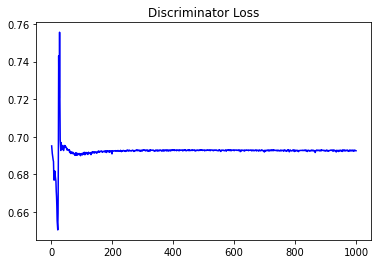

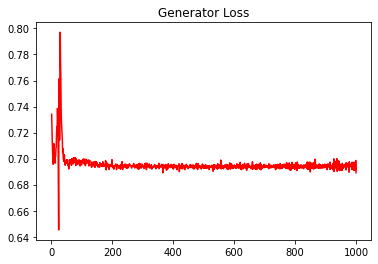

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0628050886474997


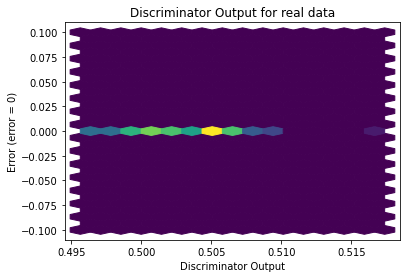

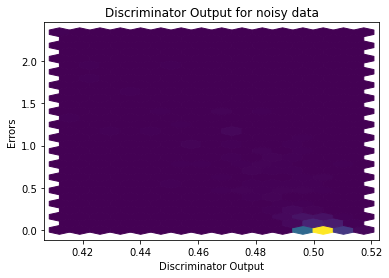

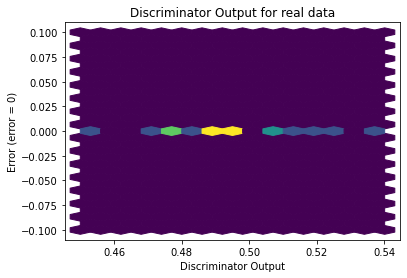

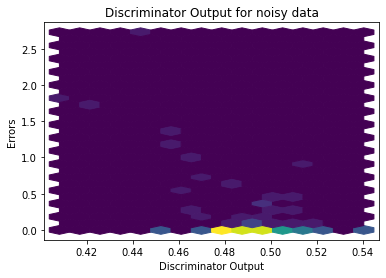

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


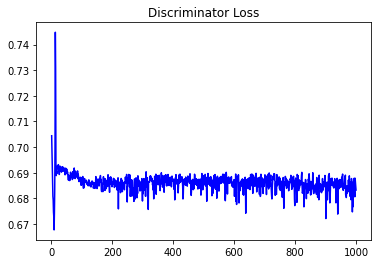

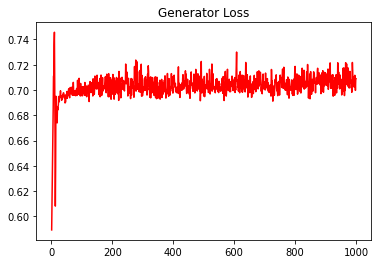

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03895689279433867


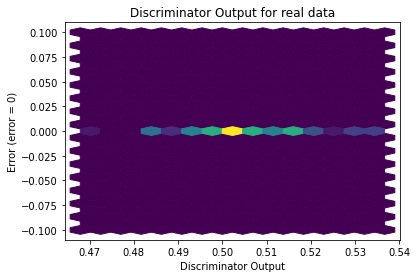

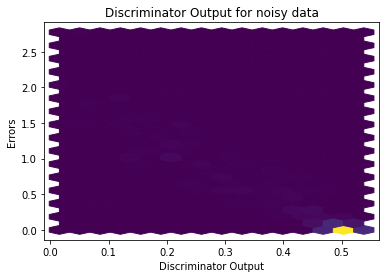

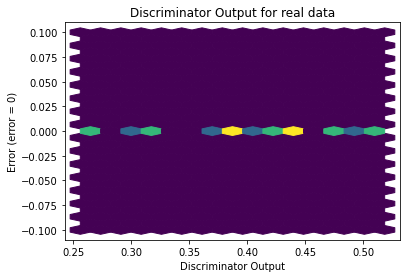

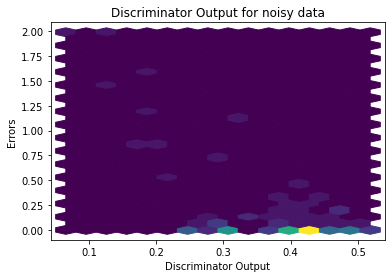

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1301]], requires_grad=True)
